In [1]:
# Created by: Jess Gallo
# Date Created: 07/10/2022
# Last Modified: 07/11/2022
# Description: Accenture Data Analyst (Forage) - Data Cleaning

In [2]:
# libraries
import pandas as pd

'''
Looking at the different datasets given, I don't believe that the Session dataset is necessary to add because Device type 
and Duration of the Users isn't important to understanding content creation. The Location dataset I believe isn't relevant 
either, especially since it is just the address and not the Country/State/City.

Now that I know which datasets I'm not using, I can now clean the datasets I know I will use.

The first thing I notice is that the User and Profile datasets can be merged together since the data represents the same thing.
'''

Users and Profiles Datasets:

In [3]:
# read file and convert to pandas dataframe
filename = r"C:\Users\Gallo\Downloads\AccentureDataAnalystData/User.csv"
dataSetCsv = pd.read_csv(filename, index_col=0)
user = pd.DataFrame(dataSetCsv)

user.head(3)

,User ID,Name,Email
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,Gary Hill,GHbnuothhymw
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,Michael Deering,MD@gmail.com
2,a8229d24-f219-4930-a382-24049a8f73bb,Richard Bain,RB@gmail.com


In [4]:
# read file and convert to pandas dataframe
filename = r"C:\Users\Gallo\Downloads\AccentureDataAnalystData/Profile.csv"
dataSetCsv = pd.read_csv(filename, index_col=0)
profile = pd.DataFrame(dataSetCsv)

profile.head(3)

,User ID,Interests,Age
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,"[0, 1]",41
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,['tennis'],23
2,a8229d24-f219-4930-a382-24049a8f73bb,"['fitness', 'cooking', 'animals', 'travel']",25


In [5]:
# checking shape of dataset
print(user.shape)
print(profile.shape)

(500, 3)
(500, 3)


In [6]:
# checking to see if any columns have missing data
user.isnull().any()

User ID    False
Name       False
Email      False
dtype: bool

In [7]:
# checking to see if any columns have missing data
profile.isnull().any()

User ID      False
Interests    False
Age          False
dtype: bool

No missing data!

In [8]:
# Join the datasets
user_profile = user.join(profile.set_index(['User ID']), on=['User ID'])
user_profile.head()

,User ID,Name,Email,Interests,Age
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,Gary Hill,GHbnuothhymw,"[0, 1]",41
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,Michael Deering,MD@gmail.com,['tennis'],23
2,a8229d24-f219-4930-a382-24049a8f73bb,Richard Bain,RB@gmail.com,"['fitness', 'cooking', 'animals', 'travel']",25
3,8f41c07f-db4f-44f3-ae81-1f99cee047eb,Kristi Mccarthy,KM@gmail.com,"['technology', 'culture', 'veganism']",2
4,3af8d78b-55c4-4ac0-8161-7cc3f6ec11c9,Betty Ellis,BE@gmail.com,['education'],44


In [9]:
# checking shape again to make sure the amount of rows stayed the same
user_profile.shape

(500, 5)

In [10]:
# checking dtypes
user_profile.dtypes

User ID      object
Name         object
Email        object
Interests    object
Age           int64
dtype: object

In [11]:
user_profile.drop(['Name', 'Email'], axis=1, inplace=True)

In [12]:
user_profile.head(3)

,User ID,Interests,Age
0,4c731e48-0377-4d7d-b4c8-b2174b774ed8,"[0, 1]",41
1,95258c36-5b6b-4591-85ee-0c43f503c1d5,['tennis'],23
2,a8229d24-f219-4930-a382-24049a8f73bb,"['fitness', 'cooking', 'animals', 'travel']",25


Content Dataset:

In [13]:
# read file and convert to pandas dataframe
filename = r"C:\Users\Gallo\Downloads\AccentureDataAnalystData/Content.csv"
dataSetCsv = pd.read_csv(filename, index_col=0)
content = pd.DataFrame(dataSetCsv)

content.head(3)

,Content ID,User ID,Type,Category,URL
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,8d3cd87d-8a31-4935-9a4f-b319bfe05f31,photo,Studying,https://socialbuzz.cdn.com/content/storage/975...
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,beb1f34e-7870-46d6-9fc7-2e12eb83ce43,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/9f7...
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,a5c65404-5894-4b87-82f2-d787cbee86b4,photo,healthy eating,https://socialbuzz.cdn.com/content/storage/230...


In [14]:
# checking to see if any columns have missing data
content.isnull().any()

Content ID    False
User ID       False
Type          False
Category      False
URL            True
dtype: bool

In [15]:
# URL column has missing data, let's see how much is missing
missing = content['URL'].isnull().sum()
not_missing = content['URL'].notnull().sum()

percent_missing = missing/(missing  + not_missing) * 100

print('Ammount of missing rows: ', missing)
print('Amount of non-missing rows: ', not_missing)
print('Total percent missing: ', percent_missing)

Ammount of missing rows:  199
Amount of non-missing rows:  801
Total percent missing:  19.900000000000002


That's about 20% of our data. Since URL isn't a column I believe we need, I think it is best to drop the column completely. I will also drop the User ID column since that is not relevent data either

In [16]:
# dropping URL columns
content = content.drop(['URL', 'User ID'], axis=1)
#content.head(3)

In [17]:
content.head()

,Content ID,Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,Studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating
3,356fff80-da4d-4785-9f43-bc1261031dc6,photo,technology
4,01ab84dd-6364-4236-abbb-3f237db77180,video,food


In [18]:
category = content['Category'].unique()
category.sort()
category

array(['"animals"', '"cooking"', '"culture"', '"dogs"', '"food"',
       '"public speaking"', '"science"', '"soccer"', '"studying"',
       '"technology"', '"tennis"', '"veganism"', 'Animals', 'Culture',
       'Education', 'Fitness', 'Food', 'Healthy Eating',
       'Public Speaking', 'Science', 'Soccer', 'Studying', 'Technology',
       'Travel', 'Veganism', 'animals', 'cooking', 'culture', 'dogs',
       'education', 'fitness', 'food', 'healthy eating',
       'public speaking', 'science', 'soccer', 'studying', 'technology',
       'tennis', 'travel', 'veganism'], dtype=object)

The Category column has a lot of data that needs to be fixed. There are a lot of duplicates because of quotes or capitalization.

In [19]:
content['Category'] = content['Category'].str.lower()
content['Category'] = content['Category'].str.replace('"', '')

In [20]:
category = content['Category'].unique()
category.sort()
category

array(['animals', 'cooking', 'culture', 'dogs', 'education', 'fitness',
       'food', 'healthy eating', 'public speaking', 'science', 'soccer',
       'studying', 'technology', 'tennis', 'travel', 'veganism'],
      dtype=object)

Category column now has no duplicates!

Reactions Dataset:

In [21]:
# read file and convert to pandas dataframe
filename = r"C:\Users\Gallo\Downloads\AccentureDataAnalystData/Reactions.csv"
dataSetCsv = pd.read_csv(filename, index_col=0)
reaction = pd.DataFrame(dataSetCsv)

reaction.head(3)

,Content ID,User ID,Type,Datetime
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,NaN,NaN,2021-04-22 15:17:15
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51


In [22]:
reaction.shape

(25553, 4)

In [23]:
# checking dtypes in dataset
reaction.dtypes

Content ID    object
User ID       object
Type          object
Datetime      object
dtype: object

There is a problem with the datatype of the DateTime column. It should be a datetime data types, not an object datatype.

In [24]:
# change Datetime dtype from object to datetime by parsing datetime
# date as: year(4)-month-date
reaction['Datetime'] = pd.to_datetime(reaction['Datetime'], format='%Y-%m-%d %H:%M:%S')

In [25]:
reaction['Datetime'].dtype

dtype('<M8[ns]')

In [26]:
reaction.isnull().any()

Content ID    False
User ID        True
Type           True
Datetime      False
dtype: bool

There are two columns missing: User ID and Type both have columns missing. Let's see  how much data is missing

In [27]:
# calculate missing data
missing_reaction_UserID = reaction['User ID'].isnull().sum()
total_reaction_UserID = reaction['User ID'].count()

percentage_missing_UserID = (missing_reaction_UserID / total_reaction_UserID) * 100

print(missing_reaction_UserID)
print(total_reaction_UserID)
print('Percentage of missing data in Users ID column: ', percentage_missing_UserID.sum())

3019
22534
Percentage of missing data in Users ID column:  13.397532617378182


In [28]:
# calculate missing data
missing_reaction_Type = reaction['Type'].isnull().sum()
total_reaction_Type = reaction['Type'].count()

percentage_missing_Type = (missing_reaction_Type / total_reaction_Type) * 100

print(missing_reaction_Type)
print(total_reaction_Type)
print('Percentage of missing data in Users ID column: ', percentage_missing_Type.sum())

980
24573
Percentage of missing data in Users ID column:  3.988117039026574


Since UserID isn't as important as the content itself, I can fill in those rows with the User ID of either the column after it.

In [29]:
# Fill User_ID with the User_ID of the User below the empty row
reaction['User ID'] = reaction['User ID'].fillna(method='bfill', axis=0)

In [30]:
reaction['User ID'].isnull().any()

False

With the Type data, which is important because it tells the client which content is most popular, I am conflicted by how I should handle this data. If i change the data by filling it with the most frequent, it might change the data significantly and change the way the data is viewed, however if I drop the rows, that's a bit of data we are loosing, but is it worth keeping data that would be a guess at best?

In [31]:
reaction['Type'].unique()

array([nan, 'disgust', 'dislike', 'scared', 'interested', 'peeking',
       'cherish', 'hate', 'love', 'indifferent', 'super love',
       'intrigued', 'worried', 'like', 'heart', 'want', 'adore'],
      dtype=object)

In [32]:
# dropping all rows with missing/nan values in Type column
reaction.dropna(axis=0, how='any', subset=['Type'], inplace=True)

In [33]:
reaction['Type'].isnull().any()

False

In [34]:
reaction.head()

,Content ID,User ID,Type,Datetime
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01
5,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58


In [35]:
reaction.shape

(24573, 4)

In [36]:
reaction.dtypes

Content ID            object
User ID               object
Type                  object
Datetime      datetime64[ns]
dtype: object

Reaction Types Dataset:

In [37]:
# read file and convert to pandas dataframe
filename = r"C:\Users\Gallo\Downloads\AccentureDataAnalystData/ReactionTypes.csv"
dataSetCsv = pd.read_csv(filename, index_col=0)
reaction_types = pd.DataFrame(dataSetCsv)

reaction_types.head(3)

,Type,Sentiment,Score
0,heart,positive,60
1,want,positive,70
2,disgust,negative,0


In [38]:
reaction_types.isnull().any()

Type         False
Sentiment    False
Score        False
dtype: bool

There is no missing data and all data and colu,ms are needed here, so there's nothing to do with this dataset

Now that are seperate datasets are cleaned and updated, I can now put all the datasets together into 1 dataset

In [39]:
# Merge the reaction and reaction_type datasets
result1 = pd.merge(reaction, reaction_types, how="left", on=['Type'])
result1.head()

,Content ID,User ID,Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30


In [40]:
result1.shape

(24573, 6)

I have to change the column name for both Type columns in Content and Result1 because they represent 2 different things, but are named the same

In [41]:
# rename column in content dataset from Type to Content Type
content.rename(columns={'Type':'Content Type'}, inplace=True)
content.head(3)

,Content ID,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,photo,studying
1,9f737e0a-3cdd-4d29-9d24-753f4e3be810,photo,healthy eating
2,230c4e4d-70c3-461d-b42c-ec09396efb3f,photo,healthy eating


In [42]:
# rename column in result1 dataset from Type to Reaction Type
result1.rename(columns={'Type': 'Reaction Type'}, inplace=True)
result1.head(3)

,Content ID,User ID,Reaction Type,Datetime,Sentiment,Score
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15


In [43]:
# Merge the result1 and content datasets
final_dataset = pd.merge(result1, content, how="left", on=['Content ID'])
final_dataset.head()

,Content ID,User ID,Reaction Type,Datetime,Sentiment,Score,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30,photo,studying


In [44]:
final_dataset.dtypes

Content ID               object
User ID                  object
Reaction Type            object
Datetime         datetime64[ns]
Sentiment                object
Score                     int64
Content Type             object
Category                 object
dtype: object

In [45]:
final_dataset.isnull().any()

Content ID       False
User ID          False
Reaction Type    False
Datetime         False
Sentiment        False
Score            False
Content Type     False
Category         False
dtype: bool

In [46]:
# save to csv to use for visualization
final_dataset.to_csv('AccentureContentData.csv')

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Score', ylabel='Density'>

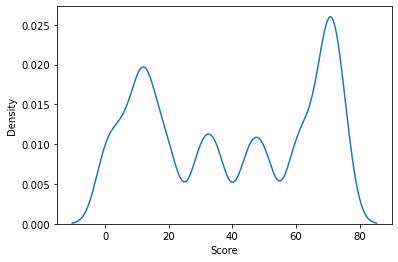

In [55]:
sns.kdeplot(data=final_dataset['Score'])

We need to convert these categorical data types to numerical data types so we can plot them

In [57]:
final_dataset.head()

,Content ID,User ID,Reaction Type,Datetime,Sentiment,Score,Content Type,Category
0,97522e57-d9ab-4bd6-97bf-c24d952602d2,5d454588-283d-459d-915d-c48a2cb4c27f,disgust,2020-11-07 09:43:50,negative,0,photo,studying
1,97522e57-d9ab-4bd6-97bf-c24d952602d2,92b87fa5-f271-43e0-af66-84fac21052e6,dislike,2021-06-17 12:22:51,negative,10,photo,studying
2,97522e57-d9ab-4bd6-97bf-c24d952602d2,163daa38-8b77-48c9-9af6-37a6c1447ac2,scared,2021-04-18 05:13:58,negative,15,photo,studying
3,97522e57-d9ab-4bd6-97bf-c24d952602d2,34e8add9-0206-47fd-a501-037b994650a2,disgust,2021-01-06 19:13:01,negative,0,photo,studying
4,97522e57-d9ab-4bd6-97bf-c24d952602d2,9b6d35f9-5e15-4cd0-a8d7-b1f3340e02c4,interested,2020-08-23 12:25:58,positive,30,photo,studying


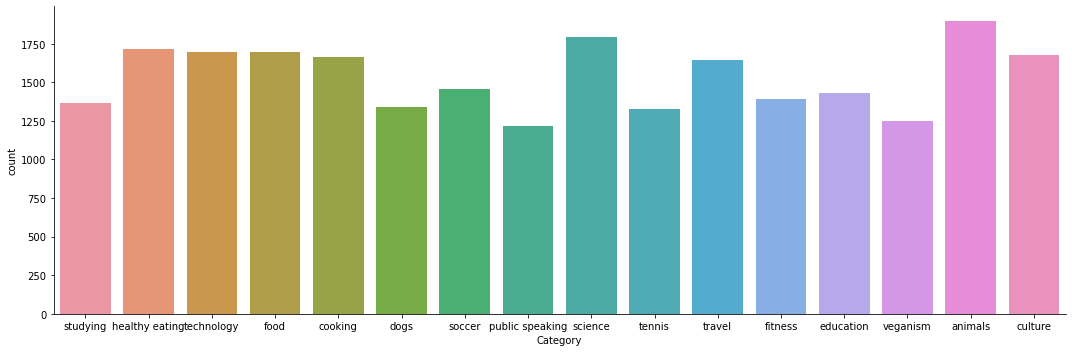

In [173]:
sns.catplot(x='Category', kind="count", data=final_dataset, height=5, aspect=3)

In [84]:
final_dataset['Category'].value_counts()['animals']

1897

In [138]:
count = final_dataset['Category'].value_counts()
count.nlargest(n=5)

animals           1897
science           1796
healthy eating    1717
food              1699
technology        1698
Name: Category, dtype: int64

In [139]:
count_df = pd.DataFrame(count)

In [140]:
count_df.head()

,Category
animals,1897
science,1796
healthy eating,1717
food,1699
technology,1698


In [141]:
count_df.columns.values[0] = "Value"

In [142]:
count_df.head()

,Value
animals,1897
science,1796
healthy eating,1717
food,1699
technology,1698


In [143]:
count_df.dtypes

Value    int64
dtype: object

<AxesSubplot:>

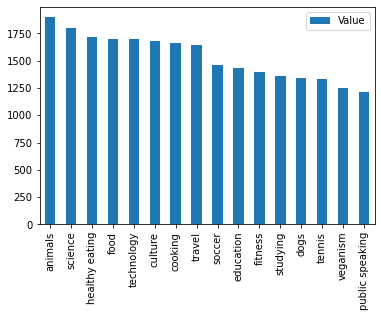

In [150]:
count_df.plot(kind='bar')

array([<AxesSubplot:ylabel='Value'>], dtype=object)

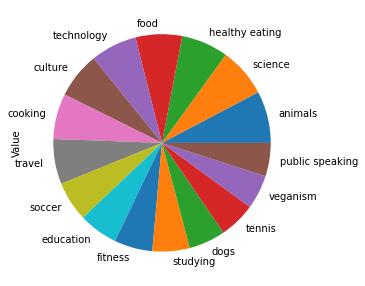

In [170]:
count_df.plot.pie(subplots=True, figsize=(9,5), legend=False)

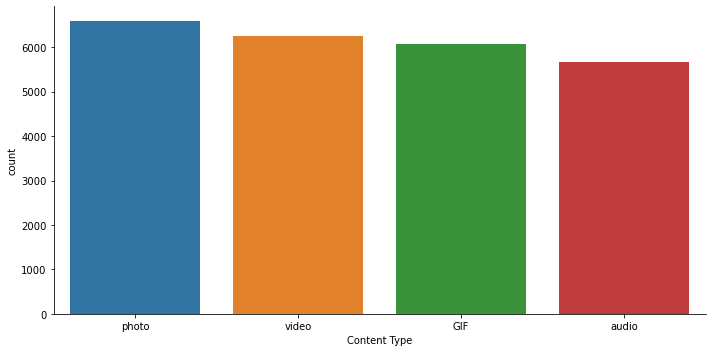

In [180]:
sns.catplot(x='Content Type', kind="count", data=final_dataset, height=5, aspect=2)

In [183]:
content_type = final_dataset['Content Type'].value_counts()
print(content_type)

photo    6589
video    6245
GIF      6079
audio    5660
Name: Content Type, dtype: int64
